Dashboard: https://public.tableau.com/views/SaaS_17201635744690/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('Saas-Sales.csv')

In [5]:
df.head(2)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820


In [6]:
rename_cols = {
    'Row ID': 'row_id',
    'Order ID': 'order_id',
    'Order Date': 'order_date',
    'Date Key': 'date_key',
    'Contact Name':'contact_name',
    'Country':'country',
    'City':'city',
    'Region':'region',
    'Subregion':'subregion',
    'Customer':'customer',
    'Customer ID':'customer_id',
    'Industry':'industry',
    'Segment':'segment',
    'Product':'product',
    'License':'license',
    'Sales':'sales',
    'Quantity':'quantity',
    'Discount':'discount',
    'Profit':'profit'
}

df.rename(columns=rename_cols, inplace=True)

In [7]:
# Check Missing Values
df.isna().sum()

row_id          0
order_id        0
order_date      0
date_key        0
contact_name    0
country         0
city            0
region          0
subregion       0
customer        0
customer_id     0
industry        0
segment         0
product         0
license         0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

In [8]:
# Remove whitespace
cols = df.select_dtypes(include=['object'])

df[cols.columns] = cols.apply(lambda x: x.str.strip(' '))

In [9]:
# Check Duplicated Data 
df.duplicated(subset='row_id').sum()

0

In [10]:
df.duplicated(subset='order_id').sum()

4985

In [11]:
# Pengecekan order id harus mewakili 1 detail customer sama
grouped = df.groupby('order_id').agg({
    'customer_id': pd.Series.nunique, 
    'customer': pd.Series.nunique,
    'contact_name': pd.Series.nunique
})

anomalies = grouped[
    (grouped['customer_id'] > 1) | 
    (grouped['customer'] > 1)|
    (grouped['contact_name'] > 1)
]

anomalies


,customer_id,customer,contact_name
order_id,,,


In [12]:
select_cols = ['order_id', 'customer_id', 'product', 'license']

df[df.duplicated(subset=select_cols)][select_cols]

,order_id,customer_id,product,license


-  Ada 4985 data order duplicate, dilakukan pengecekan pada data column diatas untuk memastikan 4985 data order duplikat tersebut merupakan data order id sama yang melakukan pemesanan berbeda.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        9994 non-null   int64  
 1   order_id      9994 non-null   object 
 2   order_date    9994 non-null   object 
 3   date_key      9994 non-null   int64  
 4   contact_name  9994 non-null   object 
 5   country       9994 non-null   object 
 6   city          9994 non-null   object 
 7   region        9994 non-null   object 
 8   subregion     9994 non-null   object 
 9   customer      9994 non-null   object 
 10  customer_id   9994 non-null   int64  
 11  industry      9994 non-null   object 
 12  segment       9994 non-null   object 
 13  product       9994 non-null   object 
 14  license       9994 non-null   object 
 15  sales         9994 non-null   float64
 16  quantity      9994 non-null   int64  
 17  discount      9994 non-null   float64
 18  profit        9994 non-null 

In [14]:
df['order_date'] = df['order_date'].astype(dtype='datetime64[ns]')

In [15]:
# Feature Engineer
df = df.assign(order_year=df.order_date.dt.year.astype('object'),\
    order_month=df.order_date.dt.month.astype(dtype='object'),\
    order_date=df.order_date.dt.day.astype(dtype='object'),\
    order_day=df.order_date.dt.strftime('%A'))

In [16]:
df['date_key'] = df['date_key'].astype(dtype='object')

In [17]:
df['profit_margin'] = round(df.profit*100/df.sales,2)
# df['price'] = df.sales/(df.quantity - (df.quantity * df.discount))

In [18]:
cols = ['country', 'region', 'subregion', 'segment', 'industry', 'product']
lists = []
for i in cols:
    lists.append([i, df[i].nunique(), df[i].unique()])

pd.set_option('display.max_colwidth', None)
pd.DataFrame(lists, columns=['columns', 'nunique', 'unique'])


,columns,nunique,unique
0,country,48,"[Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Australia, Luxembourg, Brazil, Philippines, India, United Kingdom, Chile, Spain, South Africa, Portugal, Colombia, Belgium, Russia, Netherlands, Mexico, Poland, Singapore, New Zealand, Czech Republic, Saudi Arabia, Argentina, South Korea, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, China, Austria, Indonesia, Egypt, Denmark, Croatia, Taiwan, Qatar, Slovenia, Iceland]"
1,region,3,"[EMEA, AMER, APJ]"
2,subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LATAM, ANZ, APAC, IND, EU-EAST]"
3,segment,3,"[SMB, Strategic, Enterprise]"
4,industry,10,"[Energy, Finance, Tech, Healthcare, Manufacturing, Retail, Consumer Products, Misc, Transportation, Communications]"
5,product,14,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, SaaS Connector Pack, ChatBot Plugin, Site Analytics, OneView, Support, Data Smasher, SaaS Connector Pack - Gold, Storage, Big Ol Database, Alchemy]"


- Misc pada Industry, dianggap perusahaan yang menerapkan sistem industri hybrid.

In [19]:
df.describe(include='object')

,order_id,order_date,date_key,contact_name,country,city,region,subregion,customer,industry,segment,product,license,order_year,order_month,order_day
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,31,1237,793,48,262,3,12,99,10,3,14,9994,4,12,7
top,EMEA-2023-100111,21,20220906,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K,2023,11,Tuesday
freq,14,402,38,37,2001,922,4219,2507,192,2127,5191,1842,1,3319,1462,1871


- 4985 order yang tercatat lebih dari 1x.
- Order terbanyak dipegang oleh order id `EMEA-2023-100111` dengan 14x catatan trx.
- `Leonard Kelly` merupakan contact_name yang paling sering muncul.
- `United States` merupakan negara terbanyak melakukan pemesanan product.
- `London` = kota terbanyak melakukan pemesanan product.
- Pembelian produk terbanyak pada perusahaan yang bergerak dibidang `Finance`
- `Allianz` perusaan yang melakukan pemesanan terbanyak.
- `SMB` = segment customer terbanyak yang melakukan pemesanan produk.
- `ContactMatcher`, produk paling laku.
- Pada tanggal `2022-09-06` terjadi <b>38x</b> transaksi terbanyak.
- Jumlah transaksi terbesar terjadi pada tahun `2023` 
- `Bulan 11` mencetak pemesanan terbanyak.
- `Tanggal 21` tanggal dengan frequency pemesanan terbanyak.

### Data Exploratory & Visualization

sales               Axes(0.125,0.53;0.227941x0.35)
quantity         Axes(0.398529,0.53;0.227941x0.35)
discount         Axes(0.672059,0.53;0.227941x0.35)
profit              Axes(0.125,0.11;0.227941x0.35)
profit_margin    Axes(0.398529,0.11;0.227941x0.35)
dtype: object

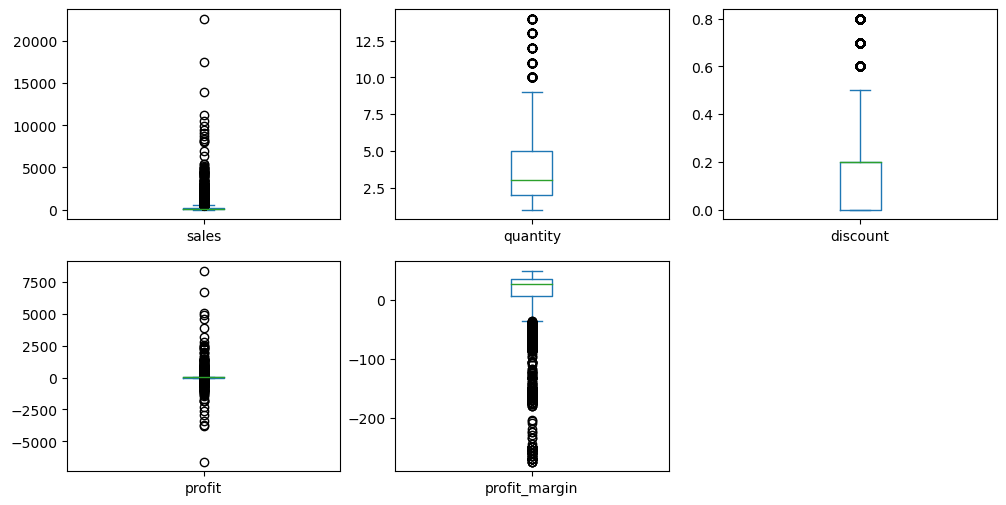

In [20]:
# Penyebaran data
df[df.columns[~df.columns.isin(['row_id', 'customer_id'])]].plot(kind='box', figsize=(12,6), subplots=True, layout=(2,3))

- Outlier Profit margin bernilai negative mengindikasi adanya kerugian significant dialami perusahaan.

In [21]:
desc = df[df.columns[~df.columns.isin(['row_id','customer_id'])]].describe()

In [22]:
desc[~desc.index.isin(['mean'])]

,sales,quantity,discount,profit,profit_margin
count,9994.000000,9994.00000,9994.000000,9994.000000,9994.000000
std,623.245101,2.22511,0.206452,234.260108,46.675436
min,0.444000,1.00000,0.000000,-6599.978000,-275.000000
25%,17.280000,2.00000,0.000000,1.728750,7.500000
50%,54.490000,3.00000,0.200000,8.666500,27.000000
75%,209.940000,5.00000,0.200000,29.364000,36.250000
max,22638.480000,14.00000,0.800000,8399.976000,50.000000


In [23]:
pd.crosstab(index=df['discount'], values=df['discount'], aggfunc='count', columns='total pemberian discount', normalize=True).sort_values(by='total pemberian discount',ascending=False)*100

col_0,total pemberian discount
discount,
0.00,48.008805
0.20,36.591955
0.70,4.182510
0.80,3.001801
0.30,2.271363
0.40,2.061237
0.60,1.380828
0.10,0.940564
0.50,0.660396


prenotes: outlier pada discount dianggap make sense.

- Sebagian besar transaksi memiliki discount pemesanan 20%

In [24]:
df.quantity.value_counts()

quantity
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: count, dtype: int64

In [25]:
q1 = desc.loc['25%']['quantity']
q3 = desc.loc['75%']['quantity']
iqr = q3-q1
upper = q3 + (iqr*1.5)
print(f'{len(df[(df.quantity > upper)])} data outliers pada qty')

170 data outliers pada qty


<Axes: >

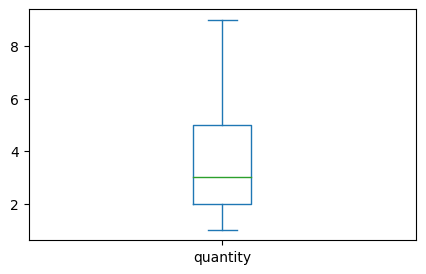

In [26]:
df[(df.quantity <= upper)].quantity.plot(kind='box', figsize=(5,3))

In [27]:
_qty_ = df[(df.quantity <= upper)].quantity.value_counts().reset_index(inplace=False)
_qty_['proportion_percentage'] = _qty_['count']/_qty_['count'].sum()*100
_qty_['cumulative_percentage'] = _qty_['proportion_percentage'].cumsum()
_qty_

,quantity,count,proportion_percentage,cumulative_percentage
0,3,2409,24.521580,24.521580
1,2,2402,24.450326,48.971906
2,5,1230,12.520358,61.492264
3,4,1191,12.123371,73.615635
4,1,899,9.151059,82.766694
5,7,606,6.168567,88.935261
6,6,572,5.822476,94.757736
7,9,258,2.626221,97.383958
8,8,257,2.616042,100.000000


80% Proporsi terbesar qty berada pada rentang 1 - 5. 

In [28]:
print(f'Median qty penjualan {(df[(df.quantity <= upper)].quantity.median())}')

Median qty penjualan 3.0


In [29]:
sales_qty = df[(df.quantity <= upper)].quantity
diff = sales_qty - 3
diff1 = sales_qty - 3.5  # hanya keperluan testing

stat, p = stats.wilcoxon(diff, zero_method="pratt")
stat1, p1 = stats.wilcoxon(diff1, zero_method="pratt") # hanya keperluan testing

if p > 0.05:
    print('Accept H0, Median 3')
else:
    print('Reject H0, Median != 3')

# hanya keperluan testing
if p1 > 0.05:
    print('Accept H0, Median 3.5')
else:
    print('Reject H0, Median != 3.5 ')

Reject H0, Median != 3
Accept H0, Median 3.5


- Pengujian wilcoxon dikalkulasi berdasarkan besaran perbedaan* terhadap nilai rata, dikarenakan reject h0 menegaskan bahwa terdapat perbedaan significant pada nilai dan distribusi data, sehingga median data tidak bisa dinyatakan 3. 
- Pada pengujian sembarang, didapatkan bahwa median yang dinyatakan wilcoxon test adalah 3.5, yang menjelaskan bahwa 'rata-rata' (median) qty berada pada rentang 3 & 4 

*https://www.investopedia.com/terms/w/wilcoxon-test.asp

In [30]:
display(df[df.sales == df.sales.max()])
display(df[df.sales == df.sales.min()])


,row_id,order_id,order_date,date_key,contact_name,country,city,region,subregion,customer,...,product,license,sales,quantity,discount,profit,order_year,order_month,order_day,profit_margin
2697,2698,EMEA-2020-145317,18,20200318,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,...,Big Ol Database,SGJPOTVE6H,22638.48,6,0.5,-1811.0784,2020,3,Wednesday,-8.0


,row_id,order_id,order_date,date_key,contact_name,country,city,region,subregion,customer,...,product,license,sales,quantity,discount,profit,order_year,order_month,order_day,profit_margin
4101,4102,APJ-2023-102288,20,20230620,Pippa Brown,Japan,Tokyo,APJ,JAPN,Volkswagen,...,OneView,3X69FF4G6O,0.444,1,0.8,-1.11,2023,6,Tuesday,-250.0


<Axes: >

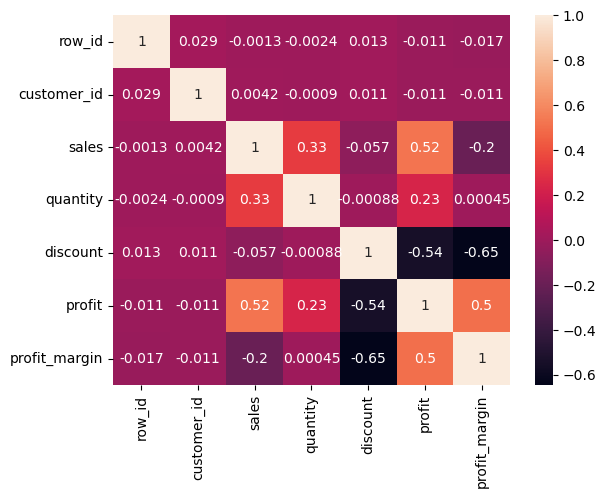

In [31]:
sns.heatmap(df.select_dtypes(include='number').corr('spearman'),annot=True)

Sales: <br>
- Quantity : 30% (weak positive)*, <b>semakin besar qty, semakin besar sales yang didapat</b>
- Profit : 52% (strong positive), <b>semakin besar sales, semakin besar profit yang didapat.</b>
- Profit Margin : -20% (weak negative), <b>semakin besar sales, kecenderungan semakin kecil profit margin yang didapat.</b> <i>(Adanya indikasi bahwa profit yang didapat pada dataset cenderung kecil).</i>
<br>

*possible jika harga satuan produk tinggi 

Quantity: <br>
- Discount : -0.0008, relasi hampir mendekati 0, maka dapat dikatakan kedua variable <b>tidak memiliki relasi satu sama lain</b>. <i>Jumlah quantity tidak mempengaruhi besaran discount</i>
- Profit : 20% (weak positive), ada <b>kecenderungan semakin besar qty, semakin besar profit yang didapat</b>.
<br>

Discount: <br>
- Profit/Profit Margin : -54% & -65% (strong negative), <b>semakin kecil discount yang diberikan semakin besar profit yang didapat</b>. 


In [32]:
df.to_csv('sales.csv', index=False)

### Data Visualization

#### Proportion

Text(0.5, 1.0, 'Customer Segment Proportion')

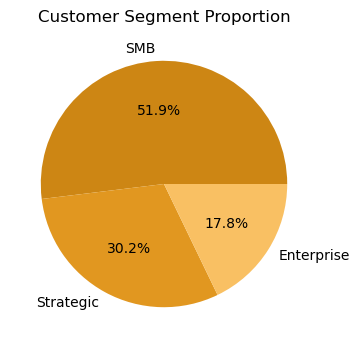

In [33]:
def func(data, all):
    d = data*100/np.sum(all)
    return "{:.1f}%".format(data, d)

# fig, ax = plt.subplots(1, 2, figsize=(10,8))
plt.figure(figsize=(5,4))
labels = df['segment'].value_counts().index.values
plt.pie(df['segment'].value_counts().to_list(), 
                     autopct=lambda x: func(x, df['segment'].value_counts().to_list()), 
                     labels=labels, 
                     textprops={'size': 10},
                     colors=['#CD8614', '#E19720', '#F9C063'],
                     )
plt.title('Customer Segment Proportion')

- Sebagian besar 80% segment customer perusahaan merupakan 51% `SMB` (Small to Medium Business), diikuti dengan 30% `Strategic `

Text(0.5, 1.0, 'Customer Company Industry')

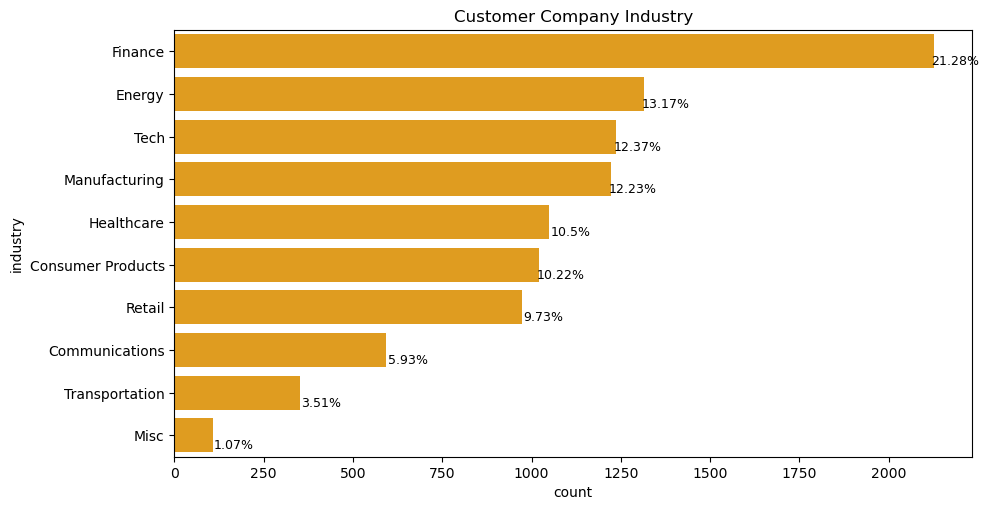

In [34]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df, y='industry', color='orange',order=df.industry.value_counts().sort_values(ascending=False).index)
for p in ax.patches:
    ax.annotate(f'{round(p.get_width()*100/len(df),2)}%', (p.get_width() + 60, p.get_y() + p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()
plt.title('Customer Company Industry')

Text(0.5, 1.0, 'Customer Company Industry')

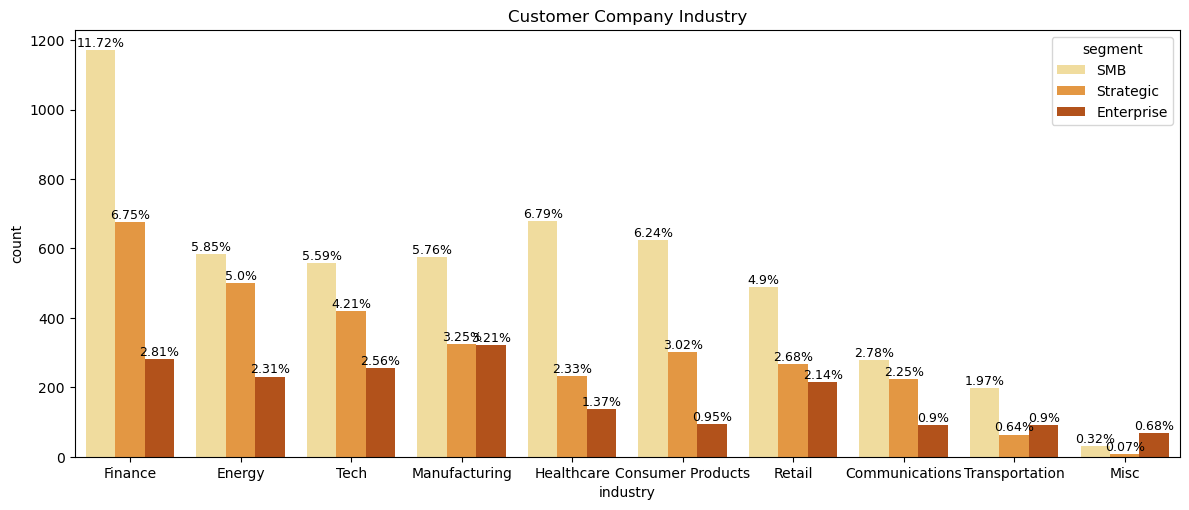

In [35]:
plt.figure(figsize=(12,5))
ax = sns.countplot(df, x='industry', palette='YlOrBr', hue = 'segment',order=df.industry.value_counts().sort_values(ascending=False).index)
for p in ax.patches:
    ax.annotate(f'{round(p.get_height()*100/len(df),2)}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()
plt.title('Customer Company Industry')

- [Customer] Industry Perusahaan terbesar bergerak dibidang `Finance` ...
- ... yang sebagian besar berada pada segment `SMB`.
- [Customer] Perusahaan `Manufacturing` memiliki proporsi segment `Enterprise` terbesar.
- [Customer] Perusahaan berstatus Misc, memiliki proporsi segment `Enterprise` terbanyak, diikuti dengan `SMB`.
<br>
<br>
- Top 5 SMB         : Finance, Healthcare, Consumer Products, Energy, and Tech
- Top 5 Strategic   : Finance, Energy, Tech, Manufacturing, and Consumer Products.
- Top 5 Enterprise  : Manufacturing, Finance, Tech, Energy, and Retail

Text(0.5, 1.0, 'Total Sales Over Product')

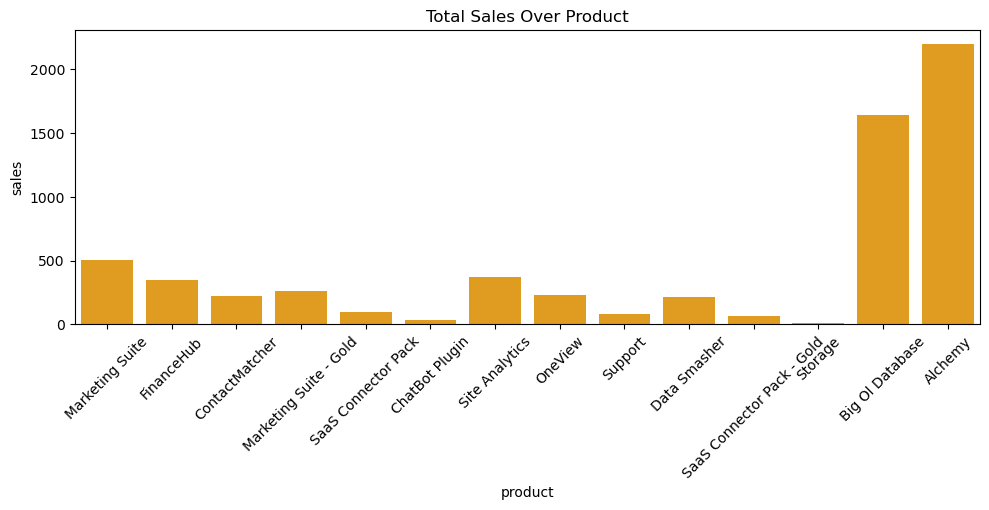

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(df, x='product', y='sales', errorbar=None, color='orange')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Total Sales Over Product')

#### Order

In [37]:
order = df.order_year.value_counts().reset_index(name='count')
sales = df.groupby(['order_year'])['sales'].sum().reset_index()

Text(0.5, 1.0, 'Transaction Growth in Year')

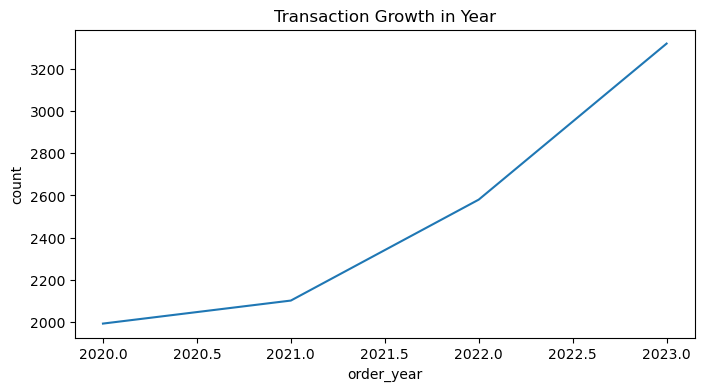

In [38]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(order, x='order_year', y='count')
ax.set_title('Transaction Growth in Year')

In [39]:
order = order.sort_index(axis=0, ascending=False, ignore_index=True)
order['percentage_growth'] = order['count'].pct_change().fillna(0) * 100
order

,order_year,count,percentage_growth
0,2020,1993,0.000000
1,2021,2102,5.469142
2,2022,2580,22.740247
3,2023,3319,28.643411


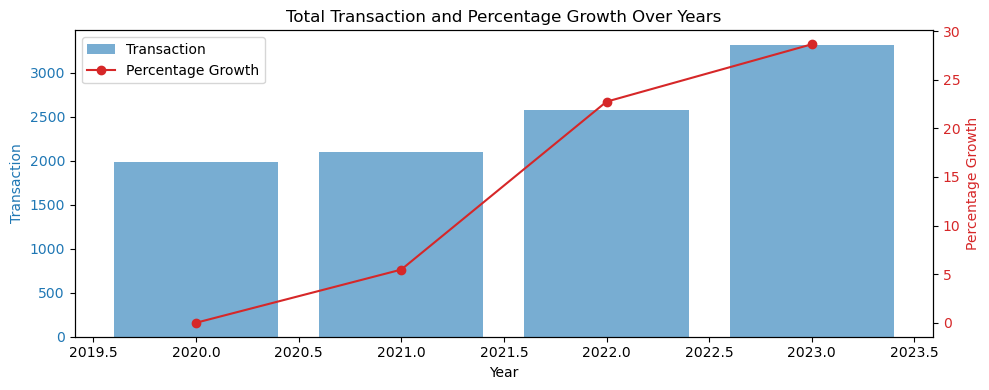

In [40]:
fig, ax1 = plt.subplots(figsize=(10, 4))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Transaction', color=color)
bars = ax1.bar(order['order_year'], order['count'], color=color, alpha=0.6, label='Transaction')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot the percentage growth
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Percentage Growth', color=color)  # we already handled the x-label with ax1
line = ax2.plot(order['order_year'], order['percentage_growth'], color=color, marker='o', label='Percentage Growth')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Total Transaction and Percentage Growth Over Years')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

- Selama 3 tahun terakhir jumlah pertumbuhan sales transaction meningkat dengan persentase peningkatan significant pada tahun 2022.

In [99]:
sales['percentage_growth'] = sales['sales'].pct_change().fillna(0) * 100

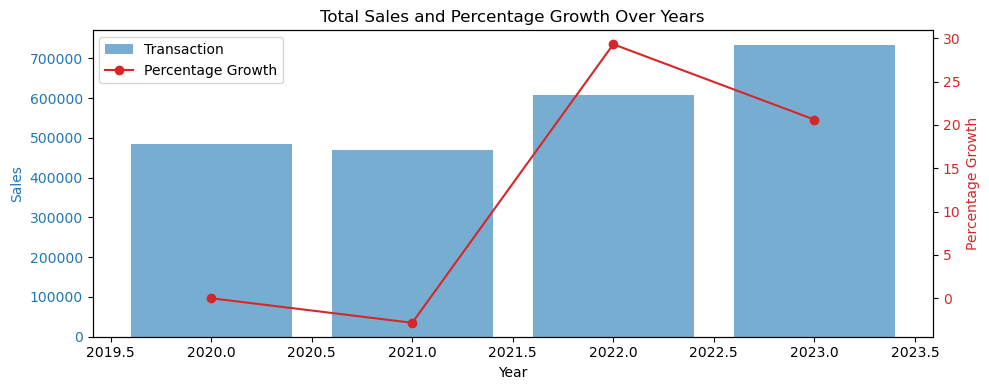

In [100]:
fig, ax1 = plt.subplots(figsize=(10, 4))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales', color=color)
bars = ax1.bar(sales['order_year'], sales['sales'], color=color, alpha=0.6, label='Transaction')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Percentage Growth', color=color)  
line = ax2.plot(sales['order_year'], sales['percentage_growth'], color=color, marker='o', label='Percentage Growth')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Total Sales and Percentage Growth Over Years')
fig.tight_layout()  

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

### Profit Growth

In [41]:
total_profit = pd.crosstab(index=df['order_year'], values=df['profit'], aggfunc='sum', columns='total_profit')
total_profit['percentage_growth'] =  total_profit['total_profit'].pct_change().fillna(0) * 100
total_profit

col_0,total_profit,percentage_growth
order_year,,
2020,49543.9741,0.000000
2021,61618.6037,24.371540
2022,81726.9308,32.633533
2023,93507.5131,14.414566


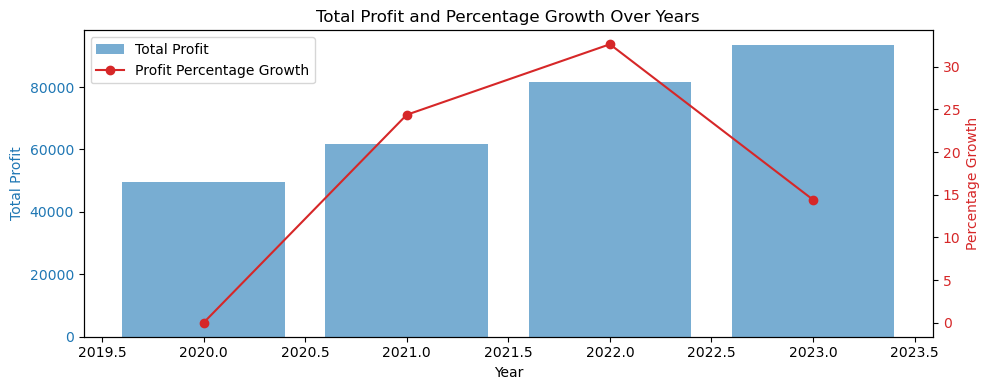

In [42]:
fig, ax1 = plt.subplots(figsize=(10, 4))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Profit', color=color)
bars = ax1.bar(total_profit.index, total_profit['total_profit'], color=color, alpha=0.6, label='Total Profit')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Percentage Growth', color=color)  
line = ax2.plot(total_profit.index, total_profit['percentage_growth'], color=color, marker='o', label='Profit Percentage Growth')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Total Profit and Percentage Growth Over Years')
fig.tight_layout() 

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

- Profit mengalami peningkatan tiap tahun terutama pada tahun 2022 sebesar 32.63%,
- Namun, persentase profit yang didapat pada tahun 2023 (14.41%) cenderung menurun.

### Deep Dive into 2023
Goal: faktor penyebab profit 2023 menurun.

In [43]:
product = pd.crosstab(columns=df[df.order_year==2023].order_year, values=df[df.order_year==2023]['profit'], aggfunc='sum', index=df[df.order_year==2023]['product'])

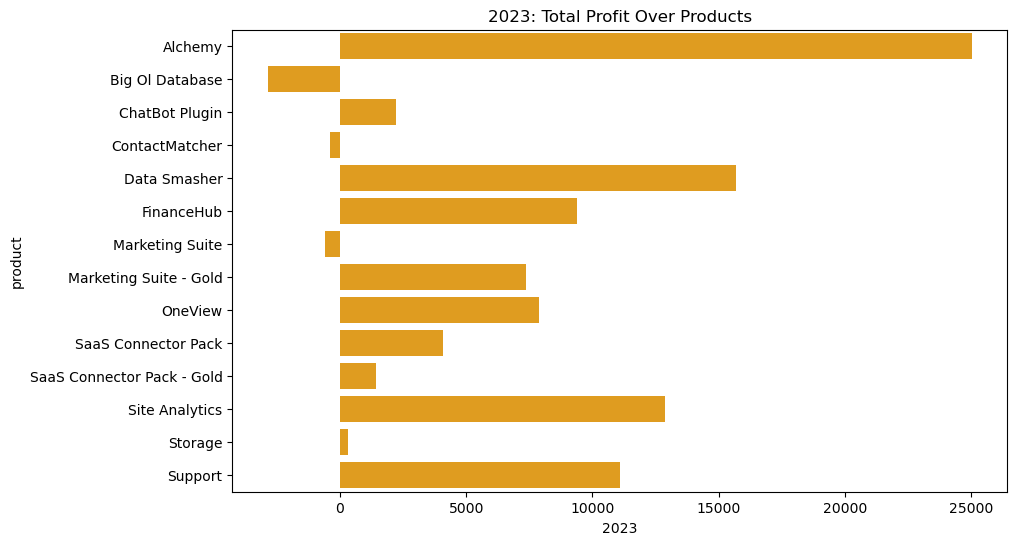

In [44]:
plt.figure(figsize=(10,6))

sns.barplot(product, y=product.index, x=product[2023], color='orange')
plt.title('2023: Total Profit Over Products')
plt.show()

- Big OI Database, Marketing Suite, dan Contact Matcher merupakan product yang mengalami penurunan selama tahun 2023.

In [45]:
product_overall = pd.crosstab(columns=df.order_year, values=df['profit'], aggfunc='sum', index=df['product'])

In [46]:
product_overall = product_overall.reset_index().melt(id_vars='product')

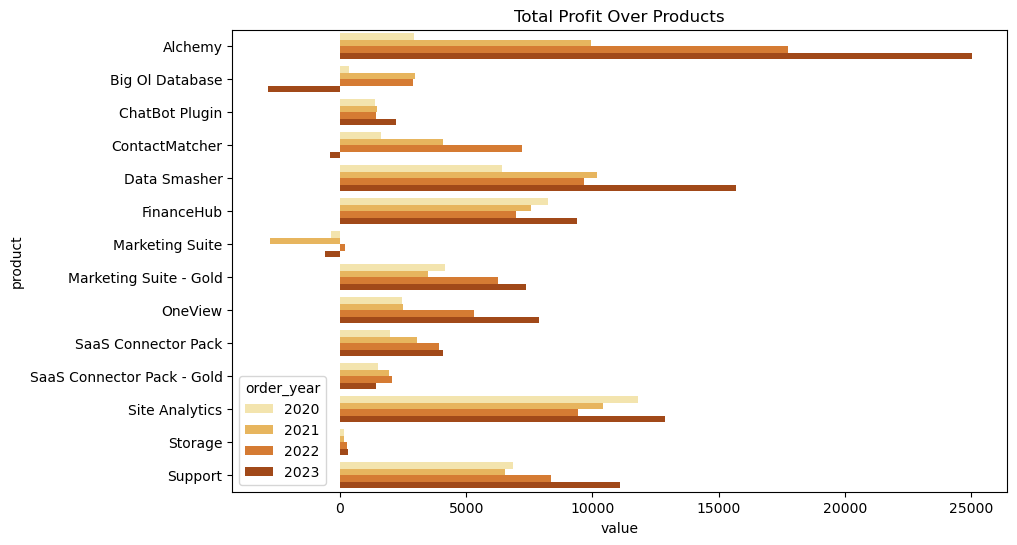

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(product_overall, y=product_overall['product'], x=product_overall['value'],hue='order_year', palette='YlOrBr')
plt.title('Total Profit Over Products')
plt.show()

- Penurunan pada Big Ol Database dan Contact Matcher hanya terjadi pada tahun 2023. 
- Penurunan Marketing Suite tidak hanya terjadi pada tahun 2023, tahun sebelumnya <i>Performance Marketing Suite memiliki record yang buruk</i>
<br>
<!-- 
Additional Summary:
- Top Performing Product : Alchemy, Data Smasher, Site Analytics, Support, and Finance Hub berkontribusi besar dalam keuntungan perusahaan.
- Least Performing Product : Marketing Suite.  -->

Text(0.5, 1.0, 'Besaran Diskon')

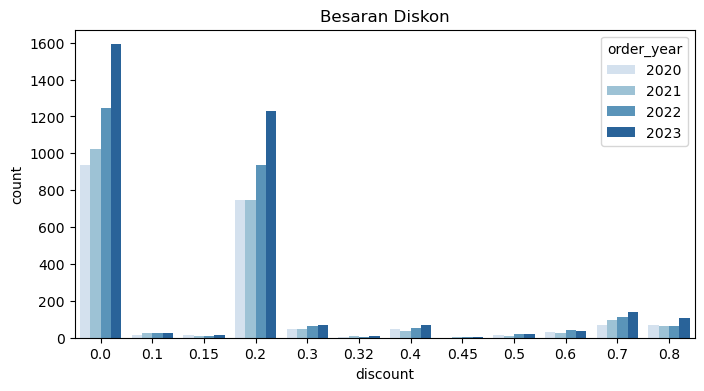

In [48]:
plt.figure(figsize=(8,4))
sns.barplot(df[['order_year', 'discount']].value_counts().reset_index(), x='discount', y='count', hue='order_year', palette='Blues')
plt.title('Besaran Diskon')

- Jumlah & besaran diskon yang diberikan setiap tahun meningkat, yang menyebabkan profit menurun*

*berdasarkan uji relasi hipotesis pada step sebelumnya

In [49]:
grouped_data = df.groupby('order_year').agg(
    total_transaksi=('order_year', 'size'),
    total_sales=('sales', 'sum'),
    average_sales=('sales', 'median'),
    total_sales_quantity=('quantity', 'sum'),
    average_sales_quantity=('quantity', 'median'),
    jumlah_diskon=('discount', lambda x: (x > 0).sum()),
    profit=('profit', 'sum'),
    profit_loss=('profit', lambda x: x[x < 0].sum()),
    profit_gained=('profit', lambda x: x[x > 0].sum()),
).reset_index()

grouped_data['profit_margin'] = grouped_data['profit'] * 100 / grouped_data['total_sales']
grouped_data['profit_loss_percentage'] = grouped_data['profit_loss'] * 100 / grouped_data['profit_gained']
grouped_data['ratio_discount'] = grouped_data['jumlah_diskon'] * 100 / grouped_data['total_transaksi']
grouped_data.rename(columns={'order_year': 'tahun'}, inplace=True)
grouped_data


,tahun,total_transaksi,total_sales,average_sales,total_sales_quantity,average_sales_quantity,jumlah_diskon,profit,profit_loss,profit_gained,profit_margin,profit_loss_percentage,ratio_discount
0,2020,1993,484247.4981,51.968,7581,3.0,1056,49543.9741,-31892.7717,81436.7458,10.231126,-39.162630,52.985449
1,2021,2102,470532.5090,59.904,7979,3.0,1079,61618.6037,-32529.3909,94147.9946,13.095504,-34.551337,51.332065
2,2022,2580,608473.8300,52.964,9810,3.0,1333,81726.9308,-37837.7145,119564.6453,13.431462,-31.646240,51.666667
3,2023,3319,733947.0232,53.720,12503,3.0,1728,93507.5131,-53871.4086,147378.9217,12.740363,-36.552994,52.063875


Text(0.5, 1.0, 'Ratio Discount (%) Over Years')

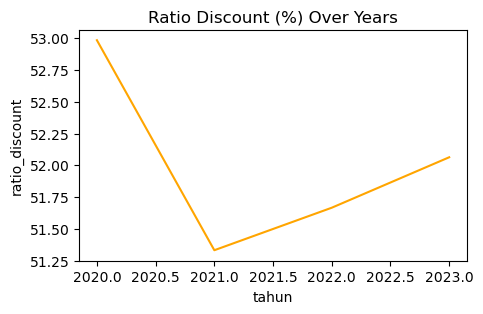

In [50]:
plt.figure(figsize=(5,3))
sns.lineplot(grouped_data, x='tahun', y='ratio_discount', color='orange')
plt.title('Ratio Discount (%) Over Years')

#### Deep Dive into Marketing Suite

In [51]:
marketing = df[df['product'] == 'Marketing Suite']

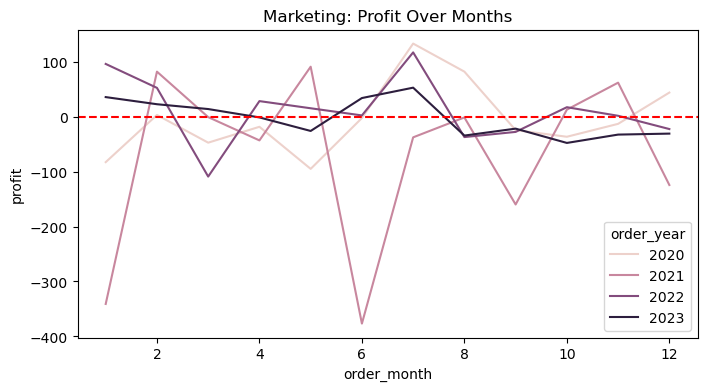

In [52]:
plt.figure(figsize=(8,4))
sns.lineplot(marketing, x='order_month', y='profit', hue='order_year', errorbar=None)
plt.axhline(0, color='r', linestyle='--')
plt.title('Marketing: Profit Over Months');

Text(0.5, 1.0, 'Marketing 2020-2023: Discount Distribution Over Months')

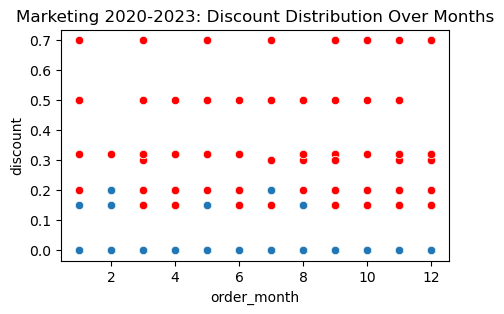

In [53]:
plt.figure(figsize=(5,3))
sns.scatterplot(marketing[(marketing.profit >= 0)], y='discount', x='order_month')
sns.scatterplot(marketing[(marketing.profit < 0)], y='discount', x='order_month', color='red')
plt.title('Marketing 2020-2023: Discount Distribution Over Months')

Text(0.5, 1.0, 'Marketing Suite: Besaran Diskon')

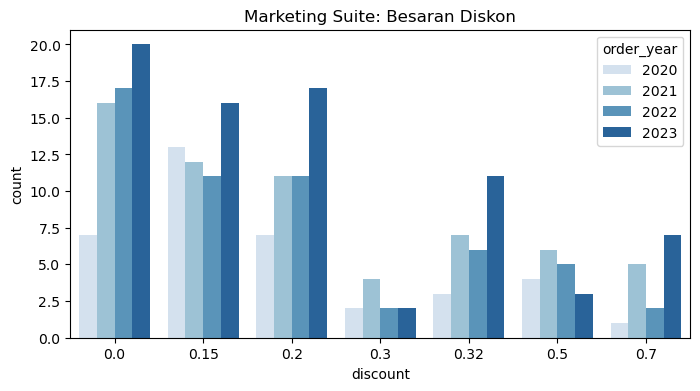

In [54]:
plt.figure(figsize=(8,4))
sns.barplot(marketing[['order_year', 'discount']].value_counts().reset_index(), x='discount', y='count', hue='order_year', palette='Blues')
plt.title('Marketing Suite: Besaran Diskon')

In [55]:
pd.crosstab(index=marketing.discount, values=marketing.discount, aggfunc='count', columns=marketing.order_year, margins=True, normalize=True)*100

order_year,2020,2021,2022,2023,All
discount,,,,,
0.0,3.070175,7.017544,7.456140,8.771930,26.315789
0.15,5.701754,5.263158,4.824561,7.017544,22.807018
0.2,3.070175,4.824561,4.824561,7.456140,20.175439
0.3,0.877193,1.754386,0.877193,0.877193,4.385965
0.32,1.315789,3.070175,2.631579,4.824561,11.842105
0.5,1.754386,2.631579,2.192982,1.315789,7.894737
0.7,0.438596,2.192982,0.877193,3.070175,6.578947
All,16.228070,26.754386,23.684211,33.333333,100.000000


Text(0.5, 1.0, 'Marketing 2020-2023: Discount vs Profit Distribution')

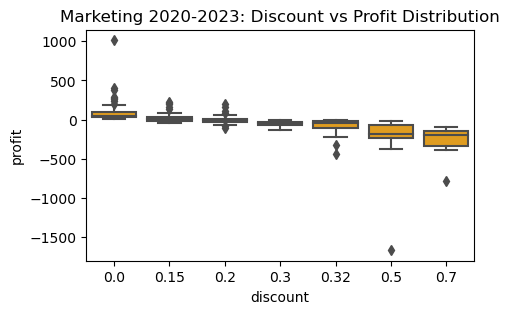

In [56]:
plt.figure(figsize=(5,3))
sns.boxplot(marketing, x='discount', y='profit', color='orange')
plt.title('Marketing 2020-2023: Discount vs Profit Distribution')

In [57]:
grouped_data = marketing.groupby('order_year').agg(
    total_transaksi=('order_year', 'size'),
    total_sales=('sales', 'sum'),
    average_sales=('sales', 'median'),
    total_sales_quantity=('quantity', 'sum'),
    average_sales_quantity=('quantity', 'median'),
    jumlah_diskon=('discount', lambda x: (x > 0).sum()),
    profit=('profit', 'sum'),
    profit_loss=('profit', lambda x: x[x < 0].sum()),
    profit_gained=('profit', lambda x: x[x > 0].sum()),
).reset_index()

grouped_data['profit_margin'] = grouped_data['profit'] * 100 / grouped_data['total_sales']
grouped_data['profit_loss_percentage'] = grouped_data['profit_loss'] * 100 / grouped_data['profit_gained']
grouped_data['ratio_discount'] = grouped_data['jumlah_diskon'] * 100 / grouped_data['total_transaksi']
grouped_data.rename(columns={'order_year': 'tahun'}, inplace=True)
grouped_data


,tahun,total_transaksi,total_sales,average_sales,total_sales_quantity,average_sales_quantity,jumlah_diskon,profit,profit_loss,profit_gained,profit_margin,profit_loss_percentage,ratio_discount
0,2020,37,20036.6776,333.9990,153,3.0,30,-346.1707,-1603.8050,1257.6343,-1.727685,-127.525545,81.081081
1,2021,61,38543.5725,369.1992,242,4.0,45,-2755.2302,-5475.4060,2720.1758,-7.148352,-201.288681,73.770492
2,2022,54,26275.4665,294.7715,197,3.0,37,212.4710,-2084.0808,2296.5518,0.808629,-90.748260,68.518519
3,2023,76,30024.2797,242.1560,276,3.0,56,-583.6261,-2988.9142,2405.2881,-1.943847,-124.264291,73.684211


Text(0.5, 1.0, 'Marketing: Profit Margin (%) Growth')

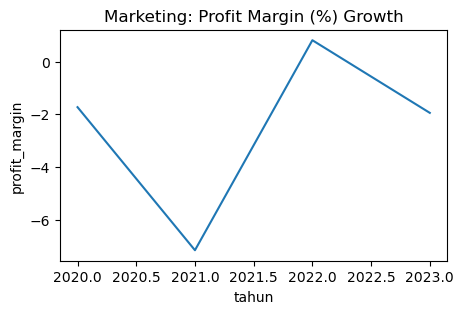

In [58]:
plt.figure(figsize=(5,3))
sns.lineplot(grouped_data, x='tahun', y='profit_margin')
plt.title('Marketing: Profit Margin (%) Growth')

In [59]:
print(len(marketing[marketing.discount == 0.7]), len(marketing[(marketing.discount == 0.7) & (marketing.profit < 0)]))

print(len(marketing[marketing.discount == 0.32]), len(marketing[(marketing.discount == 0.32) & (marketing.profit < 0)]))
print(len(marketing[marketing.discount == 0.3]), len(marketing[(marketing.discount == 0.3) & (marketing.profit < 0)]))
print(len(marketing[marketing.discount == 0.2]), len(marketing[(marketing.discount == 0.2) & (marketing.profit < 0)]))
print(len(marketing[marketing.discount == 0.15]), len(marketing[(marketing.discount == 0.15) & (marketing.profit < 0)]))

15 15
27 27
10 9
46 23
52 17


In [60]:
len(marketing[(marketing.discount > 0.3)]), len(marketing[(marketing.discount > 0.3) & (marketing.profit < 0)])

(60, 60)

In [61]:
marketing[(marketing.discount > 0.3) & (marketing.profit < 0)]['profit'].sum()

-10541.888800000002

In [62]:
marketing[(marketing.discount <= 0.3)]['profit'].sum()

7069.332799999999

- Ratio jumlah diskon terhadap total transaksi pada Marketing Suite 2022 lebih sedikit dibandingkan tahun lainnya yang menjadi pendorong profit yang didapat positif* (namun profit margin yang didapat belum bisa menutupi sebagian dari kerugian yang dihasil).
- Rentang diskon terbanyak berturut 15%, 20%, dan 32%.
- Kerugian mulai terlihat terhadap beberapa transaksi ketika discount berada pada 15%. 
- 'Seluruh' Transaksi MS yang memiliki diskon diatas 30% mengalami kerugian dengan total profit yang diperoleh -10541.8
- Sedangkan trx dengan diskon dibawah 30% memperoleh profit 7069.33. Hal ini menjadi faktor MS merugi selama 3 tahun terakhir** dimana hampir sebagian besar diskon pada MS berada pada rentang 15% keatas.


*berdasarkan uji test<br>
**pengecualian 2022

In [63]:
# Hypothesis Testing (Discount & Profit)
correlation = marketing[marketing.order_year == 2022]['discount'].corr(other = marketing[marketing.order_year == 2022]['profit'], method = 'spearman')
correlation

-0.8158911796337298

#### Deep Dive Into Big OI Database

In [64]:
bigdb = df[(df['product'] == 'Big Ol Database')]

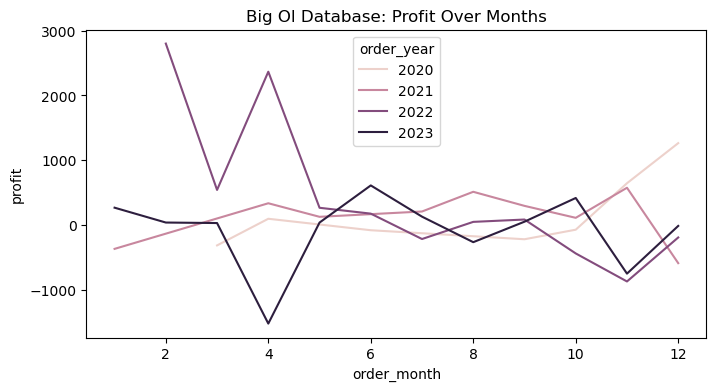

In [65]:
plt.figure(figsize=(8,4))
sns.lineplot(bigdb, x='order_month', y='profit', hue='order_year', errorbar=None)
plt.title('Big Ol Database: Profit Over Months');

Text(0.5, 1.0, 'Big Ol Database - April 2023: Discount Distribution Over Time')

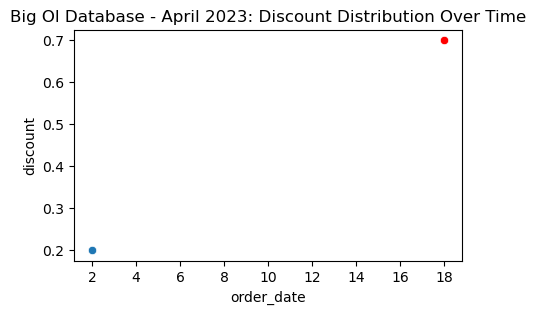

In [66]:
plt.figure(figsize=(5,3))
sns.scatterplot(bigdb[(bigdb.order_year == 2023)&(bigdb.order_month == 4) & (bigdb.profit >= 0)], y='discount', x='order_date')
sns.scatterplot(bigdb[(bigdb.order_year == 2023)&(bigdb.order_month == 4) & (bigdb.profit < 0)], y='discount', x='order_date', color='red')
plt.title('Big Ol Database - April 2023: Discount Distribution Over Time')

In [67]:
bigdb[(bigdb.order_year == 2023)&(bigdb.order_month == 4)][bigdb.profit < 0]

C:\Users\Enigmanian\AppData\Local\Temp\ipykernel_8732\2481462363.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bigdb[(bigdb.order_year == 2023)&(bigdb.order_month == 4)][bigdb.profit < 0]


,row_id,order_id,order_date,date_key,contact_name,country,city,region,subregion,customer,...,product,license,sales,quantity,discount,profit,order_year,order_month,order_day,profit_margin
3011,3012,EMEA-2023-134845,18,20230418,Joshua Vaughan,Russia,Moscow,EMEA,EU-EAST,FedEx,...,Big Ol Database,UN48B3LEBM,2549.985,5,0.7,-3399.98,2023,4,Tuesday,-133.33


In [68]:
pd.crosstab(index=bigdb.discount, values=bigdb.discount, aggfunc='count', columns=bigdb.order_year, margins=True, normalize=True)*100

order_year,2020,2021,2022,2023,All
discount,,,,,
0.0,5.217391,6.956522,6.956522,6.086957,25.217391
0.1,0.000000,0.000000,0.000000,1.739130,1.739130
0.2,4.347826,5.217391,8.695652,8.695652,26.956522
0.3,0.869565,0.869565,1.739130,0.869565,4.347826
0.4,5.217391,2.608696,0.869565,2.608696,11.304348
0.5,3.478261,0.869565,2.608696,3.478261,10.434783
0.7,3.478261,4.347826,6.956522,5.217391,20.000000
All,22.608696,20.869565,27.826087,28.695652,100.000000


In [69]:
grouped_data = bigdb.groupby('order_year').agg(
    total_transaksi=('order_year', 'size'),
    total_sales=('sales', 'sum'),
    average_sales=('sales', 'median'),
    total_sales_quantity=('quantity', 'sum'),
    average_sales_quantity=('quantity', 'median'),
    jumlah_diskon=('discount', lambda x: (x > 0).sum()),
    profit=('profit', 'sum'),
    profit_loss=('profit', lambda x: x[x < 0].sum()),
    profit_gained=('profit', lambda x: x[x > 0].sum()),
).reset_index()

grouped_data['profit_margin'] = grouped_data['profit'] * 100 / grouped_data['total_sales']
grouped_data['profit_loss_percentage'] = grouped_data['profit_loss'] * 100 / grouped_data['profit_gained']
grouped_data['ratio_discount'] = grouped_data['jumlah_diskon'] * 100 / grouped_data['total_transaksi']
grouped_data.rename(columns={'order_year': 'tahun'}, inplace=True)
grouped_data


,tahun,total_transaksi,total_sales,average_sales,total_sales_quantity,average_sales_quantity,jumlah_diskon,profit,profit_loss,profit_gained,profit_margin,profit_loss_percentage,ratio_discount
0,2020,26,62023.373,727.136,96,3.5,20,369.1689,-6710.4292,7079.5981,0.595209,-94.785454,76.923077
1,2021,24,27763.697,579.465,94,3.0,16,2977.4856,-4439.9021,7417.3877,10.724384,-59.858029,66.666667
2,2022,32,55906.886,691.050,129,3.0,24,2907.3180,-9489.9608,12397.2788,5.200286,-76.548741,75.000000
3,2023,33,43544.675,532.720,121,3.0,26,-2869.2156,-9478.3761,6609.1605,-6.589131,-143.412709,78.787879


Text(0.5, 1.0, 'Big Ol Database 2020-2023: Discount vs Profit Distribution')

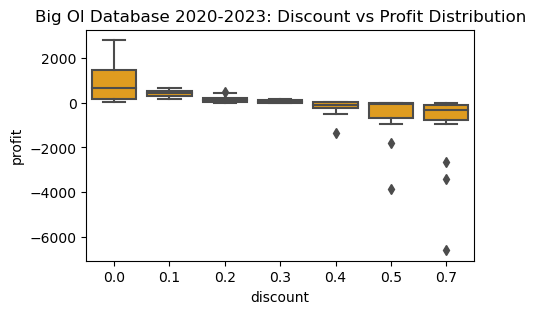

In [70]:
plt.figure(figsize=(5,3))
sns.boxplot(bigdb, x='discount', y='profit', color='orange')
# sns.scatterplot(bigdb, x='discount', y='profit', color='orange')
# plt.axhline(0, color='r', linestyle='--')
plt.title('Big Ol Database 2020-2023: Discount vs Profit Distribution')

In [71]:
print(len(bigdb[bigdb.discount == 0.7]), len(bigdb[(bigdb.discount == 0.7) & (bigdb.profit < 0)]))
print(len(bigdb[bigdb.discount == 0.5]), len(bigdb[(bigdb.discount == 0.5) & (bigdb.profit < 0)]))

print(len(bigdb[bigdb.discount == 0.4]), len(bigdb[(bigdb.discount == 0.4) & (bigdb.profit < 0)]))
print(len(bigdb[bigdb.discount == 0.2]), len(bigdb[(bigdb.discount == 0.2) & (bigdb.profit < 0)]))

23 23
12 12
13 8
31 0


In [72]:
bigdb[bigdb.order_year == 2023][(bigdb.discount >= 0.5)]['profit'].sum(), bigdb[bigdb.order_year == 2023][(bigdb.discount < 0.5) ]['profit'].sum()

C:\Users\Enigmanian\AppData\Local\Temp\ipykernel_8732\2852784935.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bigdb[bigdb.order_year == 2023][(bigdb.discount >= 0.5)]['profit'].sum(), bigdb[bigdb.order_year == 2023][(bigdb.discount < 0.5) ]['profit'].sum()
C:\Users\Enigmanian\AppData\Local\Temp\ipykernel_8732\2852784935.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bigdb[bigdb.order_year == 2023][(bigdb.discount >= 0.5)]['profit'].sum(), bigdb[bigdb.order_year == 2023][(bigdb.discount < 0.5) ]['profit'].sum()


(-9214.3794, 6345.1638)

- Rentang diskon terbanyak berturut pada transaksi Big Ol Database ada di 20%, 70%, dan 40%.
- Negative profit pada Big Ol Database 2023 disebabkan adanya penurunan profit significant pada bulan 4 terhadap 1 transaksi dengan diskon 70%. 
- Transaksi yang memiliki diskon diatas sama dengan 40% cenderung menghasilkan profit negative yang mengindikasi bahwa besaran diskon tersebut kurang sesuai.
- Kerugian pada tahun 2023 disebabkan karena profit yang diperoleh dengan diskon diatas 50%** memiliki nilai negative lebih besar dibanding profit dengan diskon dibawah 50% 

**berdasarkan discount yang seluruh transaksinya memiliki profit negative

#### Deep Dive Into Contact Matcher

In [73]:
contact = df[(df['product'] == 'ContactMatcher')]

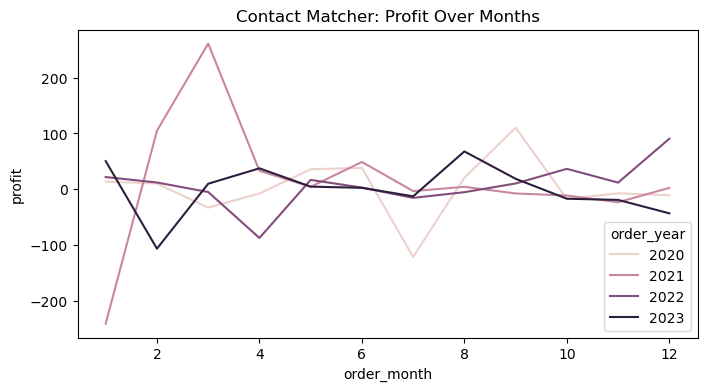

In [74]:
plt.figure(figsize=(8,4))
sns.lineplot(contact, x='order_month', y='profit', hue='order_year', errorbar=None)
plt.title('Contact Matcher: Profit Over Months');

In [75]:
contact[(contact.order_year == 2023)&(contact.order_month == 2)][contact.profit < 0]['discount'].value_counts()

C:\Users\Enigmanian\AppData\Local\Temp\ipykernel_8732\5626994.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contact[(contact.order_year == 2023)&(contact.order_month == 2)][contact.profit < 0]['discount'].value_counts()


discount
0.7    4
0.8    3
0.5    2
0.4    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Contact Matcher - Feb 2023: Discount Distribution Over Time')

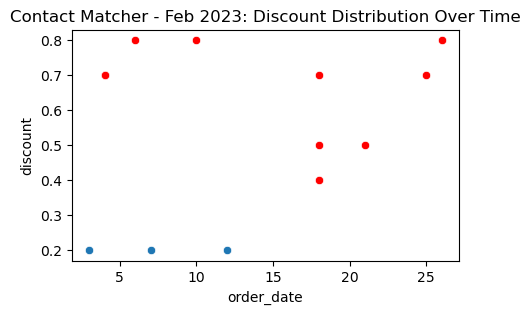

In [76]:
plt.figure(figsize=(5,3))
sns.scatterplot(contact[(contact.order_year == 2023)&(contact.order_month == 2) & (contact.profit >= 0)], y='discount', x='order_date')
sns.scatterplot(contact[(contact.order_year == 2023)&(contact.order_month == 2) & (contact.profit < 0)], y='discount', x='order_date', color='red')
plt.title('Contact Matcher - Feb 2023: Discount Distribution Over Time')

In [77]:
pd.crosstab(index=contact.discount, values=contact.discount, aggfunc='count', columns=contact.order_year, margins=True, normalize=True)*100

order_year,2020,2021,2022,2023,All
discount,,,,,
0.0,4.451683,5.211726,5.537459,7.003257,22.204126
0.2,6.568947,6.134636,10.640608,11.617807,34.961998
0.3,0.651466,0.651466,0.651466,0.977199,2.931596
0.4,0.977199,0.651466,1.140065,1.302932,4.071661
0.45,0.054289,0.162866,0.162866,0.217155,0.597177
0.5,0.488599,0.217155,0.597177,0.651466,1.954397
0.7,3.474484,4.668838,5.700326,6.786102,20.629750
0.8,2.931596,2.714441,2.660152,4.343105,12.649294
All,19.598263,20.412595,27.090119,32.899023,100.000000


In [78]:
grouped_data = contact.groupby('order_year').agg(
    total_transaksi=('order_year', 'size'),
    total_sales=('sales', 'sum'),
    average_sales=('sales', 'median'),
    total_sales_quantity=('quantity', 'sum'),
    average_sales_quantity=('quantity', 'median'),
    jumlah_diskon=('discount', lambda x: (x > 0).sum()),
    profit=('profit', 'sum'),
    profit_loss=('profit', lambda x: x[x < 0].sum()),
    profit_gained=('profit', lambda x: x[x > 0].sum()),
).reset_index()

grouped_data['profit_margin'] = grouped_data['profit'] * 100 / grouped_data['total_sales']
grouped_data['profit_loss_percentage'] = grouped_data['profit_loss'] * 100 / grouped_data['profit_gained']
grouped_data['ratio_discount'] = grouped_data['jumlah_diskon'] * 100 / grouped_data['total_transaksi']
grouped_data.rename(columns={'order_year': 'tahun'}, inplace=True)
grouped_data

,tahun,total_transaksi,total_sales,average_sales,total_sales_quantity,average_sales_quantity,jumlah_diskon,profit,profit_loss,profit_gained,profit_margin,profit_loss_percentage,ratio_discount
0,2020,361,89576.6305,27.360,1359,3.0,279,1615.6733,-16548.3089,18163.9822,1.803677,-91.105071,77.285319
1,2021,376,76603.5215,25.982,1450,3.0,280,4086.8695,-12420.2515,16507.1210,5.335094,-75.241779,74.468085
2,2022,499,110318.3815,28.485,1939,3.0,397,7197.3390,-15189.6685,22387.0075,6.524152,-67.850375,79.559118
3,2023,606,133879.7315,31.044,2467,3.0,477,-403.5996,-26764.4158,26360.8162,-0.301464,-101.531059,78.712871


Text(0.5, 1.0, 'Contact Matcher 2020-2023: Discount vs Profit Distribution')

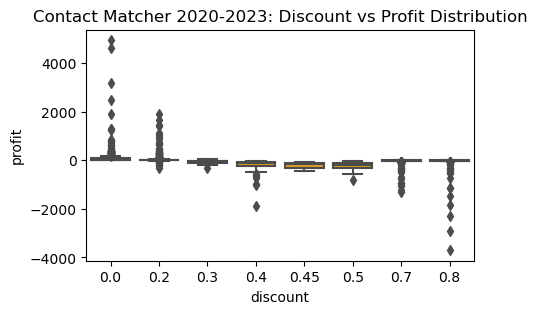

In [79]:
plt.figure(figsize=(5,3))
sns.boxplot(contact, x='discount', y='profit', color='orange')
plt.title('Contact Matcher 2020-2023: Discount vs Profit Distribution')

In [80]:
print(len(contact[contact.discount == 0.8]), len(contact[(contact.discount == 0.8) & (contact.profit < 0)]))
print(len(contact[contact.discount == 0.7]), len(contact[(contact.discount == 0.7) & (contact.profit < 0)]))
print(len(contact[contact.discount == 0.5]), len(contact[(contact.discount == 0.5) & (contact.profit < 0)]))
print(len(contact[contact.discount == 0.45]), len(contact[(contact.discount == 0.45) & (contact.profit < 0)]))
print(len(contact[contact.discount == 0.4]), len(contact[(contact.discount == 0.4) & (contact.profit < 0)]))

233 233
380 380
36 36
11 11
75 75


In [81]:
contact[contact.order_year == 2023][(contact.discount >= 0.4)]['profit'].sum(), contact[contact.order_year == 2023][(contact.discount < 0.4) ]['profit'].sum()

C:\Users\Enigmanian\AppData\Local\Temp\ipykernel_8732\4140843278.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contact[contact.order_year == 2023][(contact.discount >= 0.4)]['profit'].sum(), contact[contact.order_year == 2023][(contact.discount < 0.4) ]['profit'].sum()
C:\Users\Enigmanian\AppData\Local\Temp\ipykernel_8732\4140843278.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contact[contact.order_year == 2023][(contact.discount >= 0.4)]['profit'].sum(), contact[contact.order_year == 2023][(contact.discount < 0.4) ]['profit'].sum()


(-24964.582, 24560.9824)

- Rentang diskon terbanyak berturut pada transaksi ContactMatcher ada di 20%, 70%, dan 80%.
- Negative profit pada Contact Matcher 2023 disebabkan adanya (pengaruh) penurunan profit significant pada bulan 2 terhadap 10 transaksi dengan diskon 40-80%.*
- Seluruh transaksi yang memiliki discount >= 40% mengalami negative profit. (Indikasi besaran diskon tersebut kurang sesuai atau diperlukannya optimasi diskon).
- Kerugian Contact Matcher pada 2023 disebabkan karena profit yang diperoleh dari diskon >= 40% bernilai negative lebih besar dibanding profit dari diskon < 40%

*berdasarkan uji hipotesis

In [82]:
# Hypothesis Testing (Discount & Profit)
correlation = contact[contact.order_year == 2023]['discount'].corr(other = contact[contact.order_year == 2023]['profit'], method = 'spearman')
correlation

-0.7660273807510136

#### Improve Marketing Suite Performance ?

In [83]:
industry_product = df[['industry', 'product']].value_counts().reset_index()
country_product = df[['country', 'product']].value_counts().reset_index()
city_product = df[['city', 'product']].value_counts().reset_index()
region = df[['region', 'product']].value_counts().reset_index()
subregion = df[['subregion', 'product']].value_counts().reset_index()
customer = df[['customer', 'product']].value_counts().reset_index()
segment = df[['segment', 'product']].value_counts().reset_index()

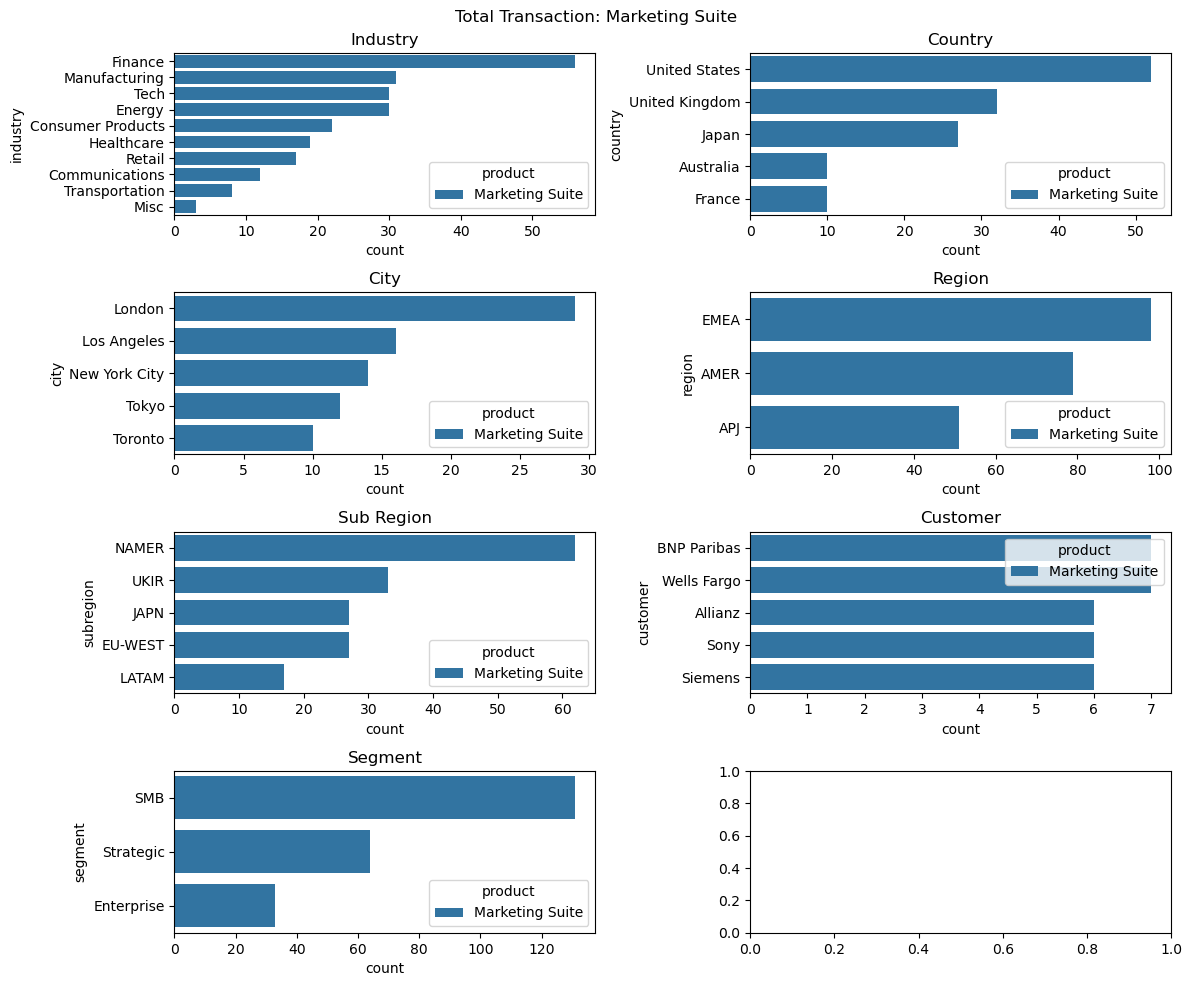

In [84]:
fig, ax = plt.subplots(4,2, figsize=(12, 10))
ax0 = sns.barplot(ax=ax[0,0], data=industry_product[industry_product['product'].isin(['Marketing Suite'])],
            y='industry', x='count', hue='product')
ax0.set_title('Industry')
ax1 = sns.barplot(ax=ax[0,1], data=country_product[country_product['product'].isin(['Marketing Suite'])].nlargest(5, columns='count'),
            y='country', x='count', hue='product')
ax1.set_title('Country')
ax2 = sns.barplot(ax=ax[1,0], data=city_product[city_product['product'].isin(['Marketing Suite'])].nlargest(5, columns='count'),
            y='city', x='count', hue='product')
ax2.set_title('City')
ax3 = sns.barplot(ax=ax[1,1], data=region[region['product'].isin(['Marketing Suite'])],
            y='region', x='count', hue='product')
ax3.set_title('Region')
ax4 = sns.barplot(ax=ax[2,0],data=subregion[subregion['product'].isin(['Marketing Suite'])].nlargest(5, columns='count'),
            y='subregion', x='count', hue='product')
ax4.set_title('Sub Region')
ax5 = sns.barplot(ax=ax[2,1], data=customer[customer['product'].isin(['Marketing Suite'])].nlargest(5, columns='count'),
            y='customer', x='count', hue='product')
ax5.set_title('Customer')
ax6 = sns.barplot(ax=ax[3,0], data=segment[segment['product'].isin(['Marketing Suite'])].nlargest(5, columns='count'),
            y='segment', x='count', hue='product')
ax6.set_title('Segment')
plt.suptitle('Total Transaction: Marketing Suite')
plt.tight_layout(pad=1);

#### Attribute that contributing to the profit of Marketing Suite

In [85]:
profit_analysis = df[(df['product'].isin(['Marketing Suite']))]

In [86]:
profit_analysis.sales.median()

306.82025

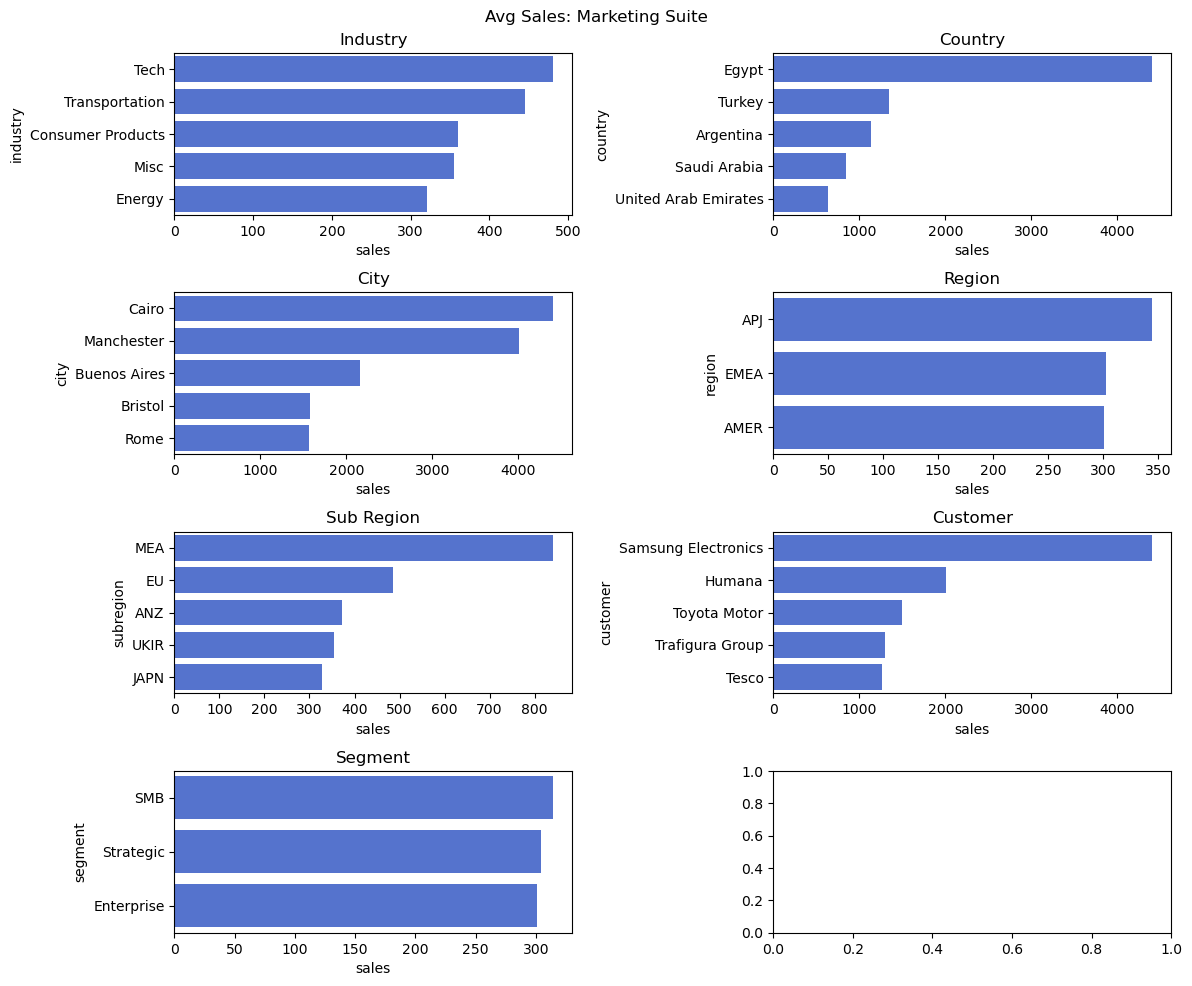

In [87]:
fig, ax = plt.subplots(4,2, figsize=(12, 10))
ax0 = sns.barplot(ax=ax[0,0], data=profit_analysis.groupby(['industry'])['sales'].median().reset_index().nlargest(5,'sales'), y='industry', x='sales',errorbar=None, color='#4169e1')
ax0.set_title('Industry')
ax1 = sns.barplot(ax=ax[0,1], data=profit_analysis.groupby(['country'])['sales'].median().reset_index().nlargest(5,'sales'), y='country', x='sales',errorbar=None, color='#4169e1')
ax1.set_title('Country')
ax2 = sns.barplot(ax=ax[1,0], data=profit_analysis.groupby(['city'])['sales'].median().reset_index().nlargest(5,'sales'), y='city', x='sales',errorbar=None, color='#4169e1')
ax2.set_title('City')
ax3 = sns.barplot(ax=ax[1,1], data=profit_analysis.groupby(['region'])['sales'].median().reset_index().nlargest(5,'sales'), y='region', x='sales',errorbar=None, color='#4169e1')
ax3.set_title('Region')
ax4 = sns.barplot(ax=ax[2,0], data=profit_analysis.groupby(['subregion'])['sales'].median().reset_index().nlargest(5,'sales'), y='subregion', x='sales',errorbar=None, color='#4169e1')
ax4.set_title('Sub Region')
ax5 = sns.barplot(ax=ax[2,1], data=profit_analysis.groupby(['customer'])['sales'].median().reset_index().nlargest(5,'sales'), y='customer', x='sales',errorbar=None, color='#4169e1')
ax5.set_title('Customer')
ax6 = sns.barplot(ax=ax[3,0], data=profit_analysis.groupby(['segment'])['sales'].median().reset_index().nlargest(5,'sales'), y='segment', x='sales',errorbar=None, color='#4169e1')
ax6.set_title('Segment')
plt.suptitle('Avg Sales: Marketing Suite')
plt.tight_layout(pad=1);

notes: top chart pada gambar atas belum tentu sebagai negara/lainnya yang memiliki avg median tertinggi, hal tersebut diseimbangkan dengan total transaksi pada chart sebelumnya. Graphic chart bawah sebagai tambahan chart referensi.

Text(0.5, 1.0, 'Marketing: Average Sales - Country')

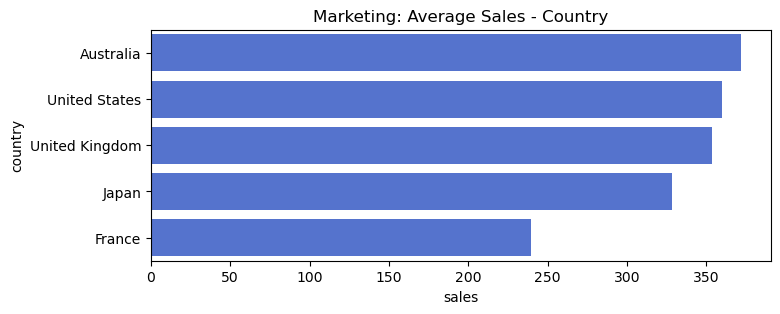

In [88]:
plt.figure(figsize=(8,3))
sns.barplot(data=profit_analysis[profit_analysis.country.isin(['United States', 'United Kingdom', 'Japan', 'Australia', 'France'])].groupby(['country'])['sales'].median().reset_index().nlargest(10,'sales'), y='country', x='sales',errorbar=None, color='#4169e1')
plt.title('Marketing: Average Sales - Country')

Text(0.5, 1.0, 'Marketing: Average Sales - City')

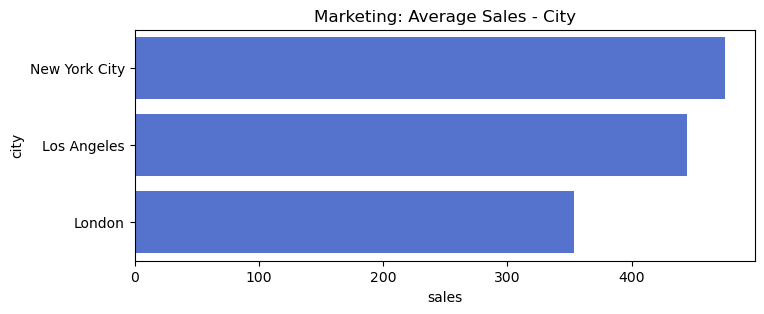

In [89]:
plt.figure(figsize=(8,3))
sns.barplot(data=profit_analysis[profit_analysis.city.isin(['London', 'Los Angeles', 'New York City'])].groupby(['city'])['sales'].median().reset_index().nlargest(10,'sales'), y='city', x='sales',errorbar=None, color='#4169e1')
plt.title('Marketing: Average Sales - City')

Text(0.5, 1.0, 'Marketing: Average Sales - Customer')

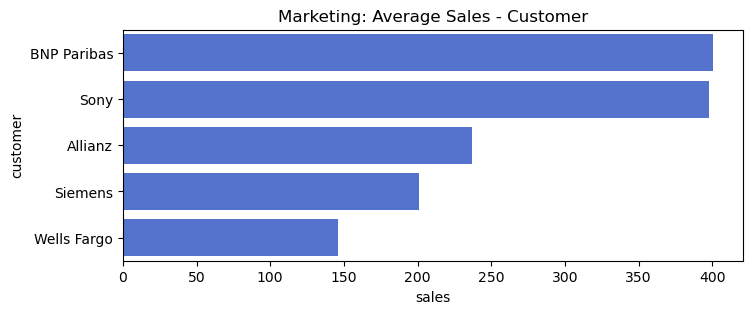

In [90]:
plt.figure(figsize=(8,3))
sns.barplot(data=profit_analysis[profit_analysis.customer.isin(['BNP Paribas', 'Wells Fargo', 'Allianz', 'Sony', 'Siemens'])].groupby(['customer'])['sales'].median().reset_index().nlargest(10,'sales'), y='customer', x='sales',errorbar=None, color='#4169e1')
plt.title('Marketing: Average Sales - Customer')

notes: menggunakan sales bukan profit, karena sales tidak bernilai negative, secara teknis semakin besar jumlah sales, semakin tinggi pendapatan yang masuk. Sedangkan profit pada dataset dipengaruhi oleh parameter discount diluar cog.

Berdasarkan top demand - sales, beberapa yang perlu diperhatikan perusahaan untuk meningkatkan performa MS:<br>
Marketing Suites is suitable for : <br>
1. EMEA & AMER Region.
2. NAMER  (AMER)  & UKIR (EMEA) Subregion
3. US (NAMER) & UK (UKIR)
4. London (UK), NYC & LA (US) City.
5. Tech, Energy, and Finance Industry.
6. BNP  Paribas & Sony Customer.


#### [Trend Analysis] Deep Dive into Transaction History

*discount > 0 : untuk melihat pengaruh pemberian discount terhadap trend analysis

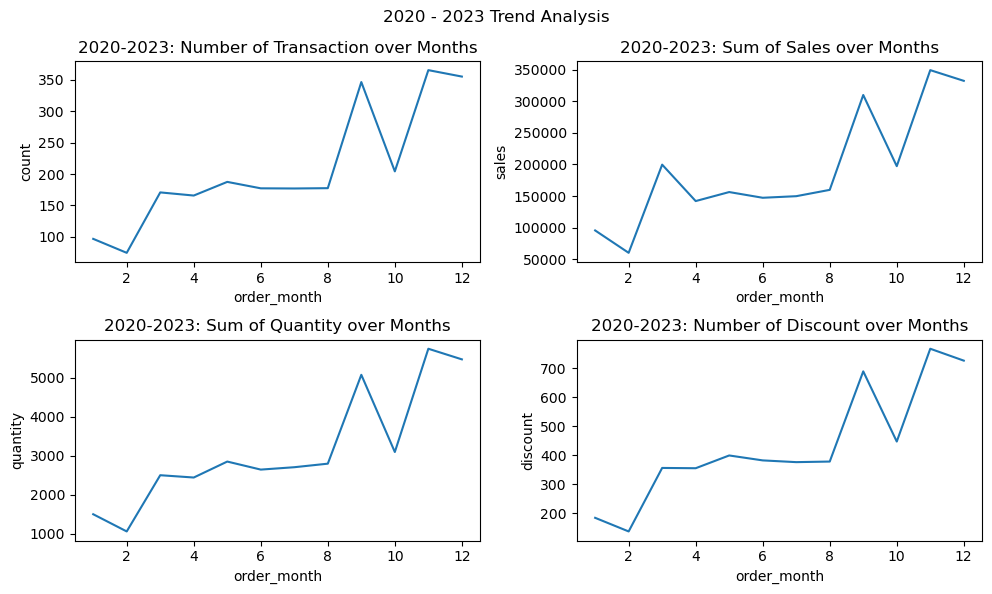

In [91]:
# plt.figure(figsize=(8,3))
fig, ax = plt.subplots(2,2, figsize=(10, 6))
ax0 = sns.lineplot(ax=ax[0,0], data=df[['order_year', 'order_month']].value_counts().reset_index(), x='order_month', y='count', errorbar=None)
ax1 = sns.lineplot(ax=ax[0,1], data=df.groupby(['order_month'])['sales'].sum().reset_index(), x='order_month', y='sales')
ax2 = sns.lineplot(ax=ax[1,0], data=df.groupby(['order_month'])['quantity'].sum().reset_index(), x='order_month', y='quantity')
ax3 = sns.lineplot(ax=ax[1,1], data=df[df.discount > 0].groupby(['order_month'])['discount'].count().reset_index(), x='order_month', y='discount')

ax0.set_title('2020-2023: Number of Transaction over Months')
ax1.set_title('2020-2023: Sum of Sales over Months')
ax2.set_title('2020-2023: Sum of Quantity over Months')
ax3.set_title('2020-2023: Number of Discount over Months')
plt.suptitle('2020 - 2023 Trend Analysis')
plt.tight_layout(pad=1);

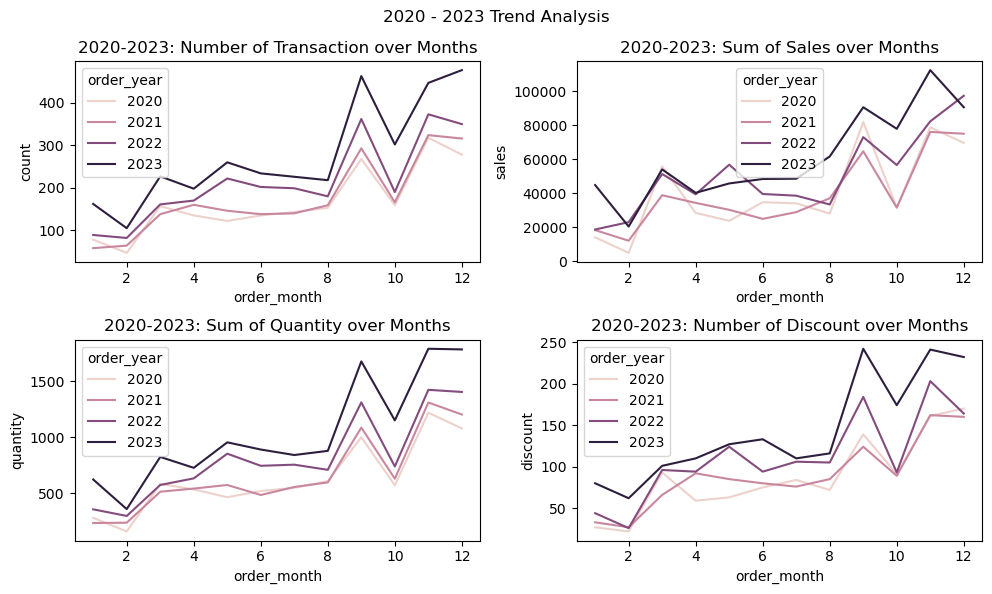

In [92]:
# plt.figure(figsize=(8,3))
fig, ax = plt.subplots(2,2, figsize=(10, 6))
ax0 = sns.lineplot(ax=ax[0,0], data=df[['order_year', 'order_month']].value_counts().reset_index(), x='order_month', y='count', hue='order_year')
ax1 = sns.lineplot(ax=ax[0,1], data=df.groupby(['order_year', 'order_month'])['sales'].sum().reset_index(), x='order_month', y='sales', hue='order_year')
ax2 = sns.lineplot(ax=ax[1,0], data=df.groupby(['order_year','order_month'])['quantity'].sum().reset_index(), x='order_month', y='quantity', hue='order_year')
ax3 = sns.lineplot(ax=ax[1,1], data=df[df.discount > 0].groupby(['order_year', 'order_month'])['discount'].count().reset_index(), x='order_month', y='discount',  hue='order_year')

ax0.set_title('2020-2023: Number of Transaction over Months')
ax1.set_title('2020-2023: Sum of Sales over Months')
ax2.set_title('2020-2023: Sum of Quantity over Months')
ax3.set_title('2020-2023: Number of Discount over Months')
plt.suptitle('2020 - 2023 Trend Analysis')
plt.tight_layout(pad=1);

- `Februari`, `Oktober` merupakan bulan dimana setiap Transaksi, Sales, Qty akan <i>menurun</i>. 
- `September`, `November` merupakan bulan dimana setiap Transaksi, Sales, Qty akan <i>melonjak</i> pesat.

In [93]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pm = df[['order_year', 'order_day']].value_counts().reset_index()
s = df.groupby(['order_year', 'order_day'])['sales'].sum().reset_index()
q = df.groupby(['order_year', 'order_day'])['quantity'].sum().reset_index()
d = df.groupby(['order_year', 'order_day'])['discount'].count().reset_index()

pm['order_day'] = pd.Categorical(pm['order_day'], categories=order, ordered=True)
s['order_day'] = pd.Categorical(s['order_day'], categories=order, ordered=True)
q['order_day'] = pd.Categorical(q['order_day'], categories=order, ordered=True)
d['order_day'] = pd.Categorical(d['order_day'], categories=order, ordered=True)

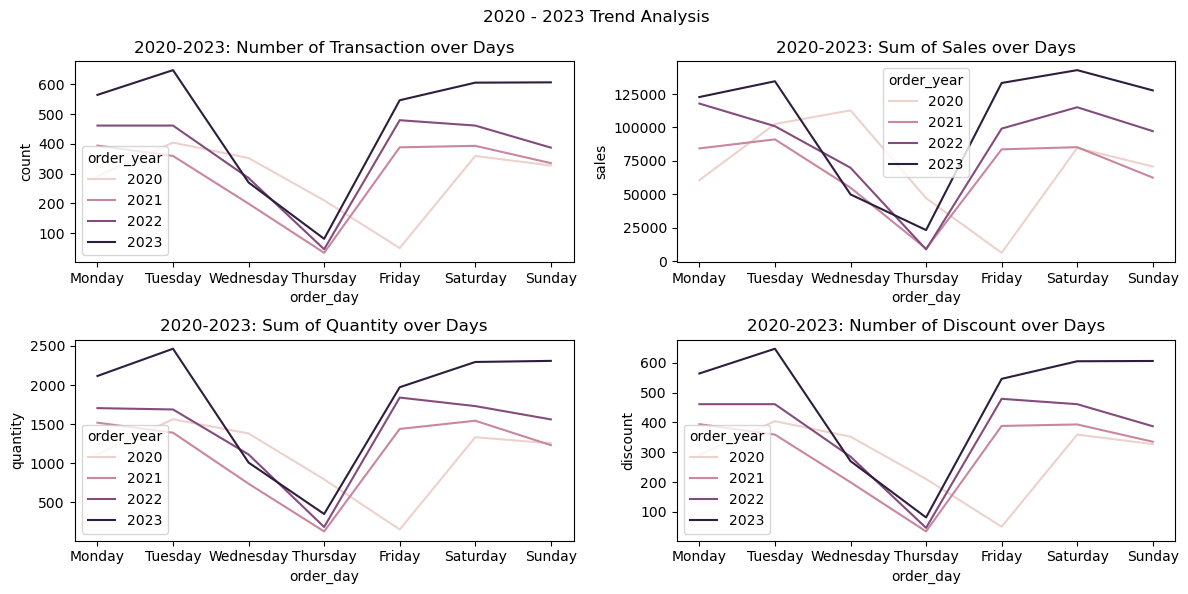

In [94]:
fig, ax = plt.subplots(2,2, figsize=(12, 6))
ax0 = sns.lineplot(ax=ax[0,0], data=pm.sort_values('order_day'), x='order_day', y='count', hue='order_year')
ax1 = sns.lineplot(ax=ax[0,1], data=s.sort_values('order_day'), x='order_day', y='sales', hue='order_year')
ax2 = sns.lineplot(ax=ax[1,0], data=q.sort_values('order_day'), x='order_day', y='quantity', hue='order_year')
ax3 = sns.lineplot(ax=ax[1,1], data=d.sort_values('order_day'), x='order_day', y='discount',  hue='order_year')

ax0.set_title('2020-2023: Number of Transaction over Days')
ax1.set_title('2020-2023: Sum of Sales over Days')
ax2.set_title('2020-2023: Sum of Quantity over Days')
ax3.set_title('2020-2023: Number of Discount over Days')
plt.suptitle('2020 - 2023 Trend Analysis')
plt.tight_layout(pad=1);

- `Wednesday` - `Thursday` merupakan hari dimana setiap Penjualan akan <i>menurun</i> 
- `Tuesday`, `Saturday`-`Sunday` merupakan hari dimana setiap Penjualan akan <i>meningkat</i> significant


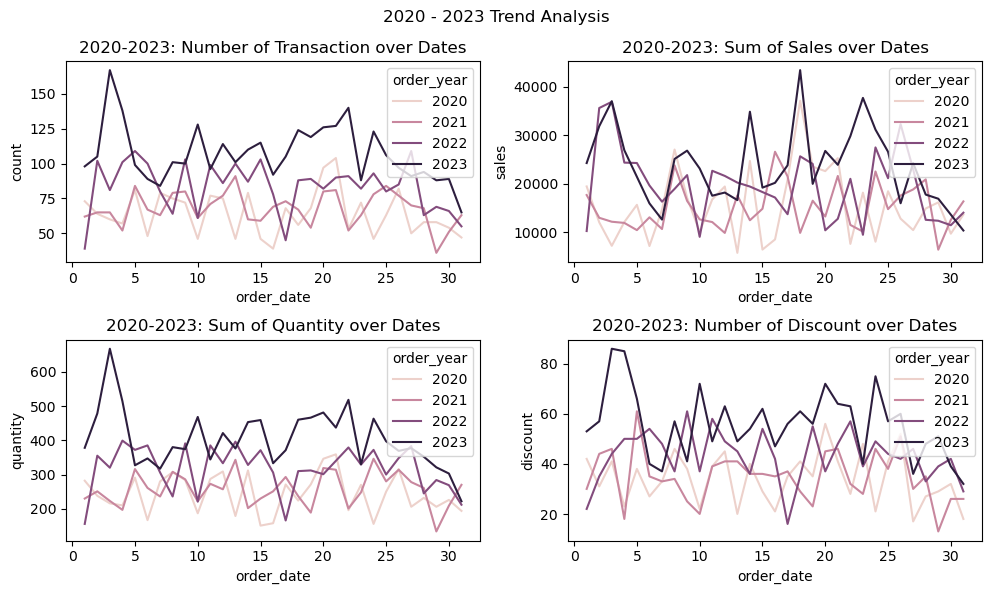

In [95]:
# plt.figure(figsize=(8,3))
fig, ax = plt.subplots(2,2, figsize=(10, 6))
ax0 = sns.lineplot(ax=ax[0,0], data=df[['order_year', 'order_date']].value_counts().reset_index(), x='order_date', y='count', hue='order_year')
ax1 = sns.lineplot(ax=ax[0,1], data=df.groupby(['order_year', 'order_date'])['sales'].sum().reset_index(), x='order_date', y='sales', hue='order_year')
ax2 = sns.lineplot(ax=ax[1,0], data=df.groupby(['order_year','order_date'])['quantity'].sum().reset_index(), x='order_date', y='quantity', hue='order_year')
ax3 = sns.lineplot(ax=ax[1,1], data=df[df.discount > 0].groupby(['order_year', 'order_date'])['discount'].count().reset_index(), x='order_date', y='discount',  hue='order_year')

ax0.set_title('2020-2023: Number of Transaction over Dates')
ax1.set_title('2020-2023: Sum of Sales over Dates')
ax2.set_title('2020-2023: Sum of Quantity over Dates')
ax3.set_title('2020-2023: Number of Discount over Dates')
# ax3.set_xlim((6,31))
plt.suptitle('2020 - 2023 Trend Analysis')
plt.tight_layout(pad=1);

Overview:<br>
1. Marketing Suite, sebagai produk dengan bad perfomance sehingga menyebabkan loss profit pada perusahaan.
2. Penyebab terjadinya kerugian pada product Big Ol Database & Contact Matcher di tahun 2023 karena besaran diskon yang diberikan terlalu besar dan banyak.

Recommendation*: (detail explaination in Presentation File) <br>
1. Optimasi Besaran dan Jumlah Diskon terhadap suatu produk.
2. Penerapan strategi sales & marketing terhadap produk Marketing Suite di berbagai top attribute dimana MS memiliki potensi besar untuk profit.
3. Menerapkan dan memanfaatkan cross-selling/upselling product terhadap top produk.  
4. Menerapkan loyalty / referral program dapat meningkatkan retensi customer yang berdampak pada pemasukan perusahaan.
5. Merencanakan strategi pada bulan/hari yang memiliki potensi profit meningkat dan potensi profit menurun untuk meminimalisir kerugian.